In [1]:
import scanpy as sc
adata = sc.read('../data/xenium/improved_outs/grouped_filtered_stardist_buffered07_adata.h5ad')

In [2]:
adata

AnnData object with n_obs × n_vars = 12937 × 541
    obs: 'id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'clusters'
    var: 'transcript_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters', 'hvg', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
import pandas as pd
csv_data = pd.read_csv('../data/xenium/41467_2023_43458_MOESM4_ESM.csv')

In [4]:
csv_data

,Genes,DCIS_1,DCIS_2,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,...,Stromal_&_T_Cell_Hybrid,IRF7+_DCs,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial
0,SERPINA3,2.327150,1.637294,-0.531378,-0.544919,2.075936,1.664456,-0.502572,-0.538760,-0.589960,...,-0.502320,-0.536950,-0.521432,-0.458220,-0.473244,-0.554848,-0.426263,-0.244188,-0.556693,-0.331122
1,ESR1,3.572079,1.791021,0.300844,-0.042592,0.431788,-0.202569,-0.396183,-0.562775,-0.591560,...,-0.545251,-0.544589,-0.262311,-0.392398,-0.239356,-0.623361,-0.279893,-0.162283,-0.483418,-0.440892
2,CEACAM6,3.621209,1.786169,-0.422193,-0.382355,0.341947,0.349583,-0.382157,-0.461351,-0.501984,...,-0.433649,-0.389543,-0.414885,-0.384354,-0.346393,-0.470224,-0.313836,-0.174916,-0.478270,-0.377087
3,CEACAM8,3.330266,2.191152,0.004957,0.029682,0.223742,0.457422,-0.379674,-0.500369,-0.529298,...,-0.526940,-0.497042,-0.495499,-0.416960,-0.383465,-0.526286,-0.369060,-0.340507,-0.524282,-0.445508
4,AGR3,2.219148,3.213558,0.083560,-0.248952,0.960034,-0.119078,-0.398760,-0.508153,-0.529606,...,-0.472275,-0.485073,-0.449064,-0.429822,-0.447497,-0.517179,-0.364233,-0.298631,-0.514593,-0.436912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,PPARG,-0.338426,-0.507219,0.316962,-0.141006,-0.559448,-0.584905,-0.120495,-0.537300,-0.639934,...,-0.572286,-0.500312,-0.480455,0.200765,0.104691,-0.464516,-0.419073,0.760710,0.824744,3.822161
309,TCF15,-0.431056,-0.359757,-0.238780,-0.325422,-0.330731,-0.402823,0.306865,-0.162181,-0.415775,...,0.046680,-0.648853,-0.310222,-0.283616,-0.128917,-0.648853,-0.648853,0.190319,0.846502,3.968071
310,TCF4,-0.705485,-0.731847,-0.684185,-0.685841,-0.396396,-0.716368,-0.583386,-0.497069,-0.582606,...,-0.423529,2.517738,0.249668,-0.136094,0.119409,-0.297976,-0.391752,1.085481,0.502645,2.658135
311,AKR1C1,0.298755,-0.465756,-0.794885,-0.797805,0.059594,2.073501,-0.855245,-0.795098,-0.837757,...,-0.140717,0.982352,-0.742926,-0.328333,0.075570,-0.860275,-0.245074,2.076440,-0.297012,2.012176


In [5]:
csv_data = csv_data.drop(columns=['Unlabeled'])

In [8]:
csv_data = csv_data.rename(columns={
    'temp': 'DCIS_2'
})

In [9]:
adata_genes = adata.var_names
adata_genes

Index(['ABCC11', 'ACTA2', 'ACTG2', 'ADAM9', 'ADGRE5', 'ADH1B', 'ADIPOQ',
       'AGR3', 'AHSP', 'AIF1',
       ...
       'ZEB2', 'ZNF562', 'antisense_ADCY4', 'antisense_BCL2L15',
       'antisense_LGI3', 'antisense_MYLIP', 'antisense_PROKR2',
       'antisense_SCRIB', 'antisense_TRMU', 'antisense_ULK3'],
      dtype='object', name='feature_name', length=541)

In [10]:
# Extract gene names from AnnData and CSV
adata_genes = adata.var_names
csv_genes = csv_data['Genes']

# Ensure genes in both datasets match
common_genes = adata_genes.intersection(csv_genes)

# Subset AnnData and CSV data to include only common genes
adata = adata[:, common_genes]
csv_data = csv_data[csv_data['Genes'].isin(common_genes)]


In [11]:
adata.var.index

Index(['ABCC11', 'ACTA2', 'ACTG2', 'ADAM9', 'ADGRE5', 'ADH1B', 'ADIPOQ',
       'AGR3', 'AHSP', 'AIF1',
       ...
       'TUBB2B', 'TYROBP', 'UCP1', 'USP53', 'VOPP1', 'VWF', 'WARS', 'ZEB1',
       'ZEB2', 'ZNF562'],
      dtype='object', name='feature_name', length=313)

In [12]:
csv_data['Genes']

0      SERPINA3
1          ESR1
2       CEACAM6
3       CEACAM8
4          AGR3
         ...   
308       PPARG
309       TCF15
310        TCF4
311      AKR1C1
312      AKR1C3
Name: Genes, Length: 313, dtype: object

In [13]:
csv_data

,Genes,DCIS_2,DCIS_1,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,Stromal_&_T_Cell_Hybrid,IRF7+_DCs,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial
0,SERPINA3,2.327150,1.637294,-0.531378,-0.544919,2.075936,1.664456,-0.502572,-0.538760,-0.589960,-0.502320,-0.536950,-0.521432,-0.458220,-0.473244,-0.554848,-0.426263,-0.244188,-0.556693,-0.331122
1,ESR1,3.572079,1.791021,0.300844,-0.042592,0.431788,-0.202569,-0.396183,-0.562775,-0.591560,-0.545251,-0.544589,-0.262311,-0.392398,-0.239356,-0.623361,-0.279893,-0.162283,-0.483418,-0.440892
2,CEACAM6,3.621209,1.786169,-0.422193,-0.382355,0.341947,0.349583,-0.382157,-0.461351,-0.501984,-0.433649,-0.389543,-0.414885,-0.384354,-0.346393,-0.470224,-0.313836,-0.174916,-0.478270,-0.377087
3,CEACAM8,3.330266,2.191152,0.004957,0.029682,0.223742,0.457422,-0.379674,-0.500369,-0.529298,-0.526940,-0.497042,-0.495499,-0.416960,-0.383465,-0.526286,-0.369060,-0.340507,-0.524282,-0.445508
4,AGR3,2.219148,3.213558,0.083560,-0.248952,0.960034,-0.119078,-0.398760,-0.508153,-0.529606,-0.472275,-0.485073,-0.449064,-0.429822,-0.447497,-0.517179,-0.364233,-0.298631,-0.514593,-0.436912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,PPARG,-0.338426,-0.507219,0.316962,-0.141006,-0.559448,-0.584905,-0.120495,-0.537300,-0.639934,-0.572286,-0.500312,-0.480455,0.200765,0.104691,-0.464516,-0.419073,0.760710,0.824744,3.822161
309,TCF15,-0.431056,-0.359757,-0.238780,-0.325422,-0.330731,-0.402823,0.306865,-0.162181,-0.415775,0.046680,-0.648853,-0.310222,-0.283616,-0.128917,-0.648853,-0.648853,0.190319,0.846502,3.968071
310,TCF4,-0.705485,-0.731847,-0.684185,-0.685841,-0.396396,-0.716368,-0.583386,-0.497069,-0.582606,-0.423529,2.517738,0.249668,-0.136094,0.119409,-0.297976,-0.391752,1.085481,0.502645,2.658135
311,AKR1C1,0.298755,-0.465756,-0.794885,-0.797805,0.059594,2.073501,-0.855245,-0.795098,-0.837757,-0.140717,0.982352,-0.742926,-0.328333,0.075570,-0.860275,-0.245074,2.076440,-0.297012,2.012176


In [14]:
# Ensure both gene lists are in the same case
adata_genes = adata.var.index.str.upper()
csv_genes = csv_data['Genes'].str.upper()

# Create a mapping between adata genes and csv data rows
csv_data.index = csv_genes  # Set the gene names as the index for easier lookup

# Filter and reorder the csv_data to match the order of adata genes
csv_data_reordered = csv_data.loc[adata_genes].dropna()


In [15]:
csv_data_reordered

,Genes,DCIS_2,DCIS_1,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,Stromal_&_T_Cell_Hybrid,IRF7+_DCs,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial
feature_name,,,,,,,,,,,,,,,,,,,,
ABCC11,ABCC11,1.627568,0.103818,2.462698,2.652923,-0.413890,-0.182707,-0.054479,-0.535060,-0.568054,-0.519494,-0.529454,-0.511962,-0.387892,-0.478463,-0.555539,-0.528292,-0.302518,-0.512950,-0.437394
ACTA2,ACTA2,-0.147560,-0.456253,-0.286599,-0.374978,1.571581,-0.483258,-0.433844,-0.492023,-0.546879,-0.432903,-0.465872,-0.521565,-0.394747,-0.415543,-0.463975,-0.431397,0.463068,3.544140,0.951923
ACTG2,ACTG2,0.853811,-0.101744,0.688588,0.183123,3.298948,0.150006,-0.518020,-0.761809,-1.017506,-0.860185,-0.642513,-0.843472,-0.052951,-0.619625,0.133467,-0.877556,0.046004,1.351866,-0.098524
ADAM9,ADAM9,0.641999,0.996737,1.973919,1.070857,0.038601,2.348248,-0.512094,-1.002861,-1.126528,-0.955982,-0.717369,-0.940024,-0.068820,0.414614,-0.933312,-0.837433,0.295960,-0.161226,0.060463
ADGRE5,ADGRE5,-1.317558,-1.461023,-1.489023,-1.474173,-0.976652,-0.554050,0.848954,1.859226,0.431848,0.822463,0.187711,0.567568,0.284671,0.503026,-1.030036,0.021441,0.341775,1.422454,0.435202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VWF,VWF,-0.308381,-0.310295,-0.242985,-0.257147,-0.276106,-0.322238,-0.198615,-0.230621,-0.234133,-0.248283,-0.177224,-0.243774,-0.219656,-0.175439,-0.217009,-0.172035,-0.062523,-0.182650,4.241487
WARS,WARS,0.423956,-0.096414,1.314041,0.660351,0.165117,0.349285,-0.436244,-0.946291,-1.405793,-1.075456,-0.946109,0.297322,1.113842,-0.906031,1.670549,-1.236518,0.500974,-0.835508,1.923884
ZEB1,ZEB1,-0.924201,-0.962277,-0.767225,-0.781500,0.157335,-0.981748,-0.140023,-0.113061,-0.460319,-0.137586,-0.151832,-0.118053,-0.212667,-0.365105,0.257218,-0.229417,1.932190,0.861553,3.155753


In [16]:

csv_data_reordered = csv_data_reordered.drop(columns='Genes')

In [17]:
csv_data_reordered

,DCIS_2,DCIS_1,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,Stromal_&_T_Cell_Hybrid,IRF7+_DCs,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial
feature_name,,,,,,,,,,,,,,,,,,,
ABCC11,1.627568,0.103818,2.462698,2.652923,-0.413890,-0.182707,-0.054479,-0.535060,-0.568054,-0.519494,-0.529454,-0.511962,-0.387892,-0.478463,-0.555539,-0.528292,-0.302518,-0.512950,-0.437394
ACTA2,-0.147560,-0.456253,-0.286599,-0.374978,1.571581,-0.483258,-0.433844,-0.492023,-0.546879,-0.432903,-0.465872,-0.521565,-0.394747,-0.415543,-0.463975,-0.431397,0.463068,3.544140,0.951923
ACTG2,0.853811,-0.101744,0.688588,0.183123,3.298948,0.150006,-0.518020,-0.761809,-1.017506,-0.860185,-0.642513,-0.843472,-0.052951,-0.619625,0.133467,-0.877556,0.046004,1.351866,-0.098524
ADAM9,0.641999,0.996737,1.973919,1.070857,0.038601,2.348248,-0.512094,-1.002861,-1.126528,-0.955982,-0.717369,-0.940024,-0.068820,0.414614,-0.933312,-0.837433,0.295960,-0.161226,0.060463
ADGRE5,-1.317558,-1.461023,-1.489023,-1.474173,-0.976652,-0.554050,0.848954,1.859226,0.431848,0.822463,0.187711,0.567568,0.284671,0.503026,-1.030036,0.021441,0.341775,1.422454,0.435202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VWF,-0.308381,-0.310295,-0.242985,-0.257147,-0.276106,-0.322238,-0.198615,-0.230621,-0.234133,-0.248283,-0.177224,-0.243774,-0.219656,-0.175439,-0.217009,-0.172035,-0.062523,-0.182650,4.241487
WARS,0.423956,-0.096414,1.314041,0.660351,0.165117,0.349285,-0.436244,-0.946291,-1.405793,-1.075456,-0.946109,0.297322,1.113842,-0.906031,1.670549,-1.236518,0.500974,-0.835508,1.923884
ZEB1,-0.924201,-0.962277,-0.767225,-0.781500,0.157335,-0.981748,-0.140023,-0.113061,-0.460319,-0.137586,-0.151832,-0.118053,-0.212667,-0.365105,0.257218,-0.229417,1.932190,0.861553,3.155753


In [18]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Convert AnnData matrix to dense format (if it's sparse)
adata_matrix = adata.X.toarray() if hasattr(adata.X, 'toarray') else adata.X

# Convert CSV data to NumPy array
csv_matrix = csv_data_reordered.values
csv_matrix = csv_matrix.T

# Initialize a dictionary to store similarities
similarity_results = {}

# Compute cosine similarity for each cell in adata with each cell in CSV data
for i, adata_row in enumerate(adata_matrix):
    similarities = cosine_similarity([adata_row], csv_matrix)
    similarity_results[adata.obs.index[i]] = similarities.flatten()

similarity_results

{'ID_100012': array([ 0.12029331, -0.01861432,  0.09094142,  0.00165384,  0.0266099 ,
        -0.03323465, -0.13826796, -0.14562451, -0.28286829, -0.12595934,
         0.02156819, -0.06674157,  0.01601935,  0.14171774, -0.18686274,
        -0.07224099,  0.36543642, -0.09822664,  0.10891138]),
 'ID_100015': array([ 0.21674859,  0.13873568,  0.14631228,  0.09145971,  0.10905345,
         0.04142989, -0.10525407, -0.14222579, -0.25293056, -0.15352517,
        -0.03895271, -0.08402483, -0.00624702, -0.00053841, -0.12464035,
        -0.10700703,  0.23097628, -0.14219877, -0.01599308]),
 'ID_100031': array([-0.00395804, -0.09880748,  0.06143208, -0.00302596,  0.06412328,
         0.01386063, -0.14802434, -0.10984941, -0.24144157, -0.07799611,
        -0.01503951, -0.02890565, -0.05743787, -0.01960039, -0.12593065,
        -0.09201469,  0.46610851,  0.02681192,  0.12532434]),
 'ID_100036': array([ 0.09237634,  0.07554619,  0.12057608,  0.09722272, -0.0005237 ,
         0.03069724, -0.0005675 

In [19]:
# Extract column names from CSV data
column_names = csv_data_reordered.columns.tolist()


In [20]:
similarity_df = pd.DataFrame(similarity_results).T  # Transpose to have cell IDs as rows

# Set column names
similarity_df.columns = column_names

# Display the resulting DataFrame
print(similarity_df)

             DCIS_2    DCIS_1  Prolif_Invasive_Tumor  Invasive_Tumor   
ID_100012  0.120293 -0.018614               0.090941        0.001654  \
ID_100015  0.216749  0.138736               0.146312        0.091460   
ID_100031 -0.003958 -0.098807               0.061432       -0.003026   
ID_100036  0.092376  0.075546               0.120576        0.097223   
ID_100072  0.114626  0.077861               0.154336        0.129713   
...             ...       ...                    ...             ...   
ID_99820   0.162779  0.048875               0.187197        0.105737   
ID_99850   0.228764  0.195699               0.167891        0.146529   
ID_99881   0.226766  0.165598               0.056718        0.068008   
ID_99926   0.106382  0.022682               0.146351        0.093828   
ID_99957   0.172508  0.063921               0.200783        0.159565   

           Myoepi_ACTA2+  Myoepi_KRT15+  T_Cell_&_Tumor_Hybrid  CD8+_T_Cells   
ID_100012       0.026610      -0.033235              -0

In [21]:
similarity_df['CellType'] = similarity_df.idxmax(axis=1)

# Display the DataFrame with the new 'CellType' column
print(similarity_df[['CellType']])

                        CellType
ID_100012                Stromal
ID_100015                Stromal
ID_100031                Stromal
ID_100036  Prolif_Invasive_Tumor
ID_100072  Prolif_Invasive_Tumor
...                          ...
ID_99820                 Stromal
ID_99850                  DCIS_2
ID_99881                  DCIS_2
ID_99926                 Stromal
ID_99957                 Stromal

[12937 rows x 1 columns]


In [22]:
similarity_df

,DCIS_2,DCIS_1,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,Stromal_&_T_Cell_Hybrid,IRF7+_DCs,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial,CellType
ID_100012,0.120293,-0.018614,0.090941,0.001654,0.026610,-0.033235,-0.138268,-0.145625,-0.282868,-0.125959,0.021568,-0.066742,0.016019,0.141718,-0.186863,-0.072241,0.365436,-0.098227,0.108911,Stromal
ID_100015,0.216749,0.138736,0.146312,0.091460,0.109053,0.041430,-0.105254,-0.142226,-0.252931,-0.153525,-0.038953,-0.084025,-0.006247,-0.000538,-0.124640,-0.107007,0.230976,-0.142199,-0.015993,Stromal
ID_100031,-0.003958,-0.098807,0.061432,-0.003026,0.064123,0.013861,-0.148024,-0.109849,-0.241442,-0.077996,-0.015040,-0.028906,-0.057438,-0.019600,-0.125931,-0.092015,0.466109,0.026812,0.125324,Stromal
ID_100036,0.092376,0.075546,0.120576,0.097223,-0.000524,0.030697,-0.000568,-0.062507,-0.091570,-0.098017,-0.062458,-0.056281,-0.026992,-0.037097,-0.067955,-0.061357,0.001316,-0.019655,0.066806,Prolif_Invasive_Tumor
ID_100072,0.114626,0.077861,0.154336,0.129713,0.000906,0.012334,0.042318,-0.044474,-0.178996,-0.084850,-0.073438,-0.076954,-0.040365,0.042208,-0.133516,-0.082147,0.149550,-0.107284,-0.021436,Prolif_Invasive_Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_99820,0.162779,0.048875,0.187197,0.105737,0.070736,0.010352,-0.111105,-0.160195,-0.294349,-0.124689,-0.078648,-0.083026,-0.057514,-0.053289,-0.148824,-0.114625,0.417730,-0.098087,0.049254,Stromal
ID_99850,0.228764,0.195699,0.167891,0.146529,0.092827,0.030166,-0.067748,-0.139433,-0.227148,-0.147887,-0.092106,-0.093191,-0.014697,-0.035227,-0.133524,-0.109142,0.140815,-0.115055,0.006898,DCIS_2
ID_99881,0.226766,0.165598,0.056718,0.068008,0.056633,0.081999,-0.041426,-0.070728,-0.098503,-0.102956,-0.022245,-0.063645,-0.053416,-0.061427,-0.062286,-0.065467,-0.029521,-0.057444,0.001717,DCIS_2
ID_99926,0.106382,0.022682,0.146351,0.093828,0.122550,0.008880,-0.104235,-0.132209,-0.241610,-0.114623,-0.096052,-0.097243,-0.065514,-0.035934,-0.176643,-0.102366,0.296113,0.045151,0.101018,Stromal


In [23]:
numeric_df = similarity_df.drop(columns=['CellType'])

# Find the maximum value per row
similarity_df['similarity'] = numeric_df.max(axis=1)

In [24]:
similarity_df

,DCIS_2,DCIS_1,Prolif_Invasive_Tumor,Invasive_Tumor,Myoepi_ACTA2+,Myoepi_KRT15+,T_Cell_&_Tumor_Hybrid,CD8+_T_Cells,CD4+_T_Cells,Stromal_&_T_Cell_Hybrid,...,B_Cells,Macrophages_1,Macrophages_2,LAMP3+_DCs,Mast_Cells,Stromal,Perivascular-Like,Endothelial,CellType,similarity
ID_100012,0.120293,-0.018614,0.090941,0.001654,0.026610,-0.033235,-0.138268,-0.145625,-0.282868,-0.125959,...,-0.066742,0.016019,0.141718,-0.186863,-0.072241,0.365436,-0.098227,0.108911,Stromal,0.365436
ID_100015,0.216749,0.138736,0.146312,0.091460,0.109053,0.041430,-0.105254,-0.142226,-0.252931,-0.153525,...,-0.084025,-0.006247,-0.000538,-0.124640,-0.107007,0.230976,-0.142199,-0.015993,Stromal,0.230976
ID_100031,-0.003958,-0.098807,0.061432,-0.003026,0.064123,0.013861,-0.148024,-0.109849,-0.241442,-0.077996,...,-0.028906,-0.057438,-0.019600,-0.125931,-0.092015,0.466109,0.026812,0.125324,Stromal,0.466109
ID_100036,0.092376,0.075546,0.120576,0.097223,-0.000524,0.030697,-0.000568,-0.062507,-0.091570,-0.098017,...,-0.056281,-0.026992,-0.037097,-0.067955,-0.061357,0.001316,-0.019655,0.066806,Prolif_Invasive_Tumor,0.120576
ID_100072,0.114626,0.077861,0.154336,0.129713,0.000906,0.012334,0.042318,-0.044474,-0.178996,-0.084850,...,-0.076954,-0.040365,0.042208,-0.133516,-0.082147,0.149550,-0.107284,-0.021436,Prolif_Invasive_Tumor,0.154336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_99820,0.162779,0.048875,0.187197,0.105737,0.070736,0.010352,-0.111105,-0.160195,-0.294349,-0.124689,...,-0.083026,-0.057514,-0.053289,-0.148824,-0.114625,0.417730,-0.098087,0.049254,Stromal,0.417730
ID_99850,0.228764,0.195699,0.167891,0.146529,0.092827,0.030166,-0.067748,-0.139433,-0.227148,-0.147887,...,-0.093191,-0.014697,-0.035227,-0.133524,-0.109142,0.140815,-0.115055,0.006898,DCIS_2,0.228764
ID_99881,0.226766,0.165598,0.056718,0.068008,0.056633,0.081999,-0.041426,-0.070728,-0.098503,-0.102956,...,-0.063645,-0.053416,-0.061427,-0.062286,-0.065467,-0.029521,-0.057444,0.001717,DCIS_2,0.226766
ID_99926,0.106382,0.022682,0.146351,0.093828,0.122550,0.008880,-0.104235,-0.132209,-0.241610,-0.114623,...,-0.097243,-0.065514,-0.035934,-0.176643,-0.102366,0.296113,0.045151,0.101018,Stromal,0.296113


In [25]:
import pandas as pd

# Assuming similarity_df is already defined

# Drop the 'CellType' column and retain only numerical data
similarity_data = similarity_df.drop(columns=['CellType'])

In [26]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:325: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca
2024-09-01 19:29:24.631915: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
celltype_df = similarity_df[['CellType']].copy()

In [28]:
adata2_indices = adata.obs.index
celltype_df_indices = celltype_df.index

print(adata2_indices.equals(celltype_df_indices))

True


In [29]:
adata.obs['CellType'] = celltype_df['CellType']

In [30]:
adata.obs['similarity'] = similarity_df['similarity']

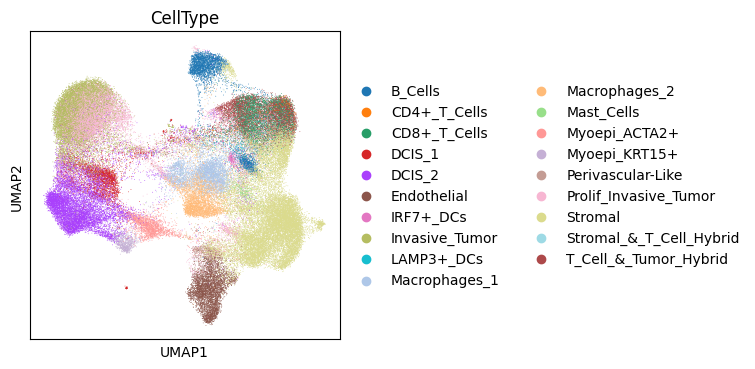

In [98]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=[ "CellType"], wspace=0.4)

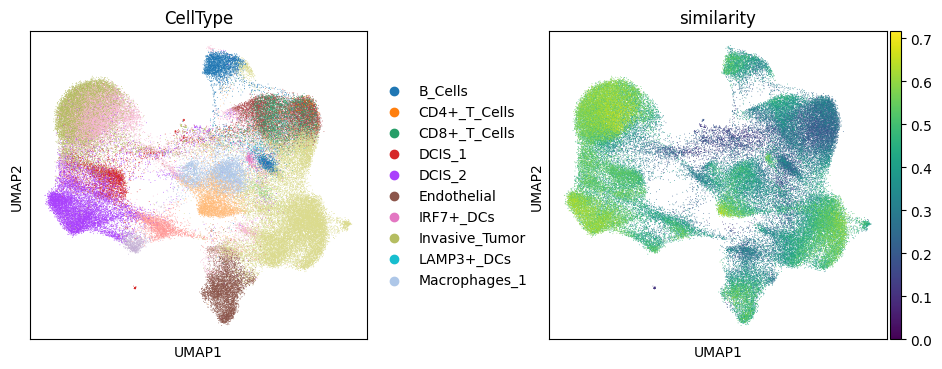

In [99]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["CellType", "similarity"], wspace=0.4)

In [31]:
annotation_csv = pd.read_csv('../data/xenium/outs/insitu_replicate_1_annotation.csv')
annotation_csv

,Barcode,Cluster
0,1,DCIS_1
1,2,DCIS_1
2,3,Unlabeled
3,4,Invasive_Tumor
4,5,DCIS_1
...,...,...
167775,167776,DCIS_2
167776,167777,DCIS_1
167777,167778,DCIS_2
167778,167779,DCIS_1


In [32]:
annotation_csv[annotation_csv['Barcode']==134602]

,Barcode,Cluster
134601,134602,Stromal


In [33]:
annotation_unlabeled = annotation_csv[annotation_csv['Cluster'] == 'Unlabeled']['Barcode'].values
annotation_unlabeled

array([     3,      6,      7, ..., 167622, 167623, 167772])

In [36]:
import geopandas as gpd
joined = gpd.read_file('../data/xenium/outs/final_adatas/filtered_gdf_stardist_buffered07.geojson')

In [37]:
joined

,id,cell_id,geometry
0,ID_100012,140584.0,"POLYGON ((23844.21090 13620.76253, 23844.27769..."
1,ID_100015,145773.0,"POLYGON ((22484.35790 11535.57612, 22484.30306..."
2,ID_100031,140869.0,"POLYGON ((23949.10899 13863.70133, 23949.07851..."
3,ID_100036,146804.0,"POLYGON ((22455.00616 12460.01043, 22454.67143..."
4,ID_100072,145768.0,"POLYGON ((22615.15845 11568.77724, 22614.70465..."
...,...,...,...
12932,ID_99820,144020.0,"POLYGON ((23758.06343 12122.38147, 23758.06449..."
12933,ID_99850,145869.0,"POLYGON ((23311.53381 12531.20816, 23311.56501..."
12934,ID_99881,146361.0,"POLYGON ((22372.53568 11575.54407, 22372.50902..."
12935,ID_99926,127897.0,"POLYGON ((21610.70332 12947.80564, 21610.71195..."


In [38]:
adata.obs.reset_index(drop=True, inplace=True)

In [39]:
adata.obs['id'] = adata.obs['id'].values

In [40]:
# Ensure IDs are of the same type
joined['id'] = joined['id'].astype(str)
adata.obs['id'] = adata.obs['id'].astype(str)

# Filter joined to only include rows with ids present in adata.obs['id']
filtered_joined = joined[joined['id'].isin(adata.obs['id'])]

# Drop duplicates based on the 'id' column

# Check the resulting DataFrame
print(filtered_joined)


              id   cell_id                                           geometry
0      ID_100012  140584.0  POLYGON ((23844.21090 13620.76253, 23844.27769...
1      ID_100015  145773.0  POLYGON ((22484.35790 11535.57612, 22484.30306...
2      ID_100031  140869.0  POLYGON ((23949.10899 13863.70133, 23949.07851...
3      ID_100036  146804.0  POLYGON ((22455.00616 12460.01043, 22454.67143...
4      ID_100072  145768.0  POLYGON ((22615.15845 11568.77724, 22614.70465...
...          ...       ...                                                ...
12932   ID_99820  144020.0  POLYGON ((23758.06343 12122.38147, 23758.06449...
12933   ID_99850  145869.0  POLYGON ((23311.53381 12531.20816, 23311.56501...
12934   ID_99881  146361.0  POLYGON ((22372.53568 11575.54407, 22372.50902...
12935   ID_99926  127897.0  POLYGON ((21610.70332 12947.80564, 21610.71195...
12936   ID_99957  144234.0  POLYGON ((23875.21911 12265.50677, 23875.27232...

[12937 rows x 3 columns]


In [41]:
filtered_joined

,id,cell_id,geometry
0,ID_100012,140584.0,"POLYGON ((23844.21090 13620.76253, 23844.27769..."
1,ID_100015,145773.0,"POLYGON ((22484.35790 11535.57612, 22484.30306..."
2,ID_100031,140869.0,"POLYGON ((23949.10899 13863.70133, 23949.07851..."
3,ID_100036,146804.0,"POLYGON ((22455.00616 12460.01043, 22454.67143..."
4,ID_100072,145768.0,"POLYGON ((22615.15845 11568.77724, 22614.70465..."
...,...,...,...
12932,ID_99820,144020.0,"POLYGON ((23758.06343 12122.38147, 23758.06449..."
12933,ID_99850,145869.0,"POLYGON ((23311.53381 12531.20816, 23311.56501..."
12934,ID_99881,146361.0,"POLYGON ((22372.53568 11575.54407, 22372.50902..."
12935,ID_99926,127897.0,"POLYGON ((21610.70332 12947.80564, 21610.71195..."


In [42]:
adata.obs = adata.obs.merge(filtered_joined[['id', 'cell_id']], on='id', how='left')

# Now adata.obs has a new 'cell_id' column
print(adata.obs.head())

          id  n_genes_by_counts  log1p_n_genes_by_counts  total_counts   
0  ID_100012                 81                 4.406719         224.0  \
1  ID_100015                 30                 3.433987          44.0   
2  ID_100031                 37                 3.637586          61.0   
3  ID_100036                  3                 1.386294           3.0   
4  ID_100072                 14                 2.708050          19.0   

   log1p_total_counts  pct_counts_in_top_50_genes   
0            5.416100                   86.160714  \
1            3.806662                  100.000000   
2            4.127134                  100.000000   
3            1.386294                  100.000000   
4            2.995732                  100.000000   

   pct_counts_in_top_100_genes  pct_counts_in_top_200_genes   
0                        100.0                        100.0  \
1                        100.0                        100.0   
2                        100.0                 

In [43]:
annotation_csv['Barcode'] = annotation_csv['Barcode'].astype(float)

In [44]:
adata.obs['cell_id'] = adata.obs['cell_id'].astype(float)

In [45]:
# Perform the merge
merged_df = adata.obs.merge(annotation_csv, left_on='cell_id', right_on='Barcode', how='left')


In [46]:
adata.obs['realCellType'] = merged_df['Cluster']

In [47]:
adata.obs[adata.obs['cell_id']=='4']

,id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,clusters,CellType,similarity,cell_id,realCellType


In [48]:
# Filter out rows in adata where 'cell_id' is in the unlabeled_cell_ids list
adata = adata[~adata.obs['cell_id'].isin(annotation_unlabeled)]

/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/lollijagladiseva/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


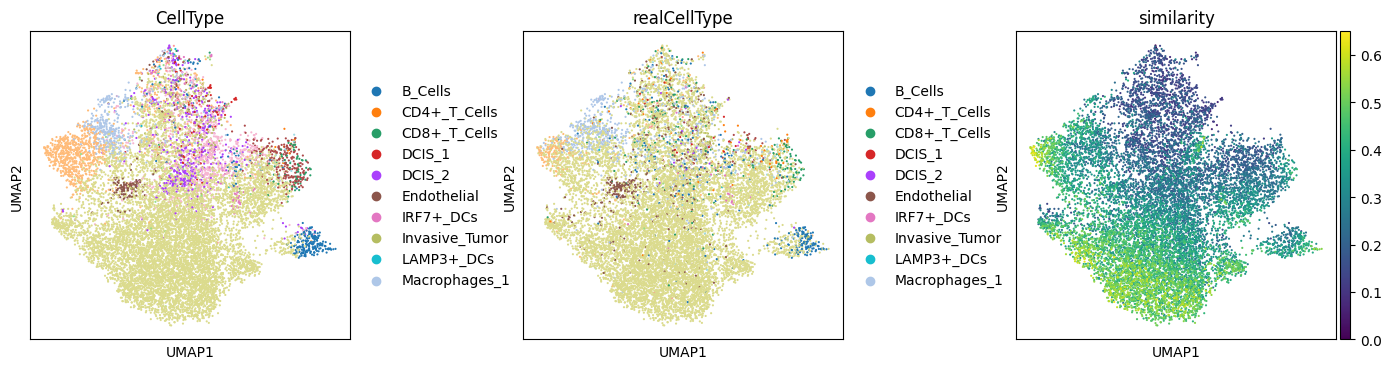

In [50]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["CellType", "realCellType", 'similarity'], wspace=0.4)

In [51]:
adata.obs

,id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,clusters,CellType,similarity,cell_id,realCellType
0,ID_100012,81,4.406719,224.0,5.416100,86.160714,100.0,100.0,100.0,1,Stromal,0.365436,140584.0,Stromal
1,ID_100015,30,3.433987,44.0,3.806662,100.000000,100.0,100.0,100.0,1,Stromal,0.230976,145773.0,Stromal
2,ID_100031,37,3.637586,61.0,4.127134,100.000000,100.0,100.0,100.0,0,Stromal,0.466109,140869.0,Stromal
3,ID_100036,3,1.386294,3.0,1.386294,100.000000,100.0,100.0,100.0,7,Prolif_Invasive_Tumor,0.120576,146804.0,Macrophages_1
4,ID_100072,14,2.708050,19.0,2.995732,100.000000,100.0,100.0,100.0,1,Prolif_Invasive_Tumor,0.154336,145768.0,Myoepi_ACTA2+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12931,ID_99814,38,3.663562,83.0,4.430817,100.000000,100.0,100.0,100.0,0,Stromal,0.321132,131232.0,Stromal
12932,ID_99820,66,4.204693,154.0,5.043425,89.610390,100.0,100.0,100.0,0,Stromal,0.417730,144020.0,Stromal
12934,ID_99881,3,1.386294,3.0,1.386294,100.000000,100.0,100.0,100.0,2,DCIS_2,0.226766,146361.0,Stromal
12935,ID_99926,31,3.465736,47.0,3.871201,100.000000,100.0,100.0,100.0,0,Stromal,0.296113,127897.0,Stromal


In [52]:
from sklearn.metrics import adjusted_rand_score

# Assuming 'CellType' and 'realCellType' are the columns in adata.obs
ari_score = adjusted_rand_score(adata.obs['CellType'], adata.obs['realCellType'])

print(f"Adjusted Rand Index: {ari_score}")

Adjusted Rand Index: 0.34659432173193155


In [53]:
adata.obs['cell_id'] = adata.obs['cell_id'].astype(str)
filtered_joined['cell_id'] = filtered_joined['cell_id'].astype(str)

In [54]:
filtered_joined_with_types = filtered_joined.merge(
    adata.obs[['cell_id', 'CellType', 'realCellType']],
    on='cell_id',
    how='left'
)

# Check the resulting GeoDataFrame
print(filtered_joined_with_types)

              id   cell_id                                           geometry   
0      ID_100012  140584.0  POLYGON ((23844.21090 13620.76253, 23844.27769...  \
1      ID_100012  140584.0  POLYGON ((23844.21090 13620.76253, 23844.27769...   
2      ID_100015  145773.0  POLYGON ((22484.35790 11535.57612, 22484.30306...   
3      ID_100015  145773.0  POLYGON ((22484.35790 11535.57612, 22484.30306...   
4      ID_100031  140869.0  POLYGON ((23949.10899 13863.70133, 23949.07851...   
...          ...       ...                                                ...   
15072   ID_99850  145869.0  POLYGON ((23311.53381 12531.20816, 23311.56501...   
15073   ID_99881  146361.0  POLYGON ((22372.53568 11575.54407, 22372.50902...   
15074   ID_99881  146361.0  POLYGON ((22372.53568 11575.54407, 22372.50902...   
15075   ID_99926  127897.0  POLYGON ((21610.70332 12947.80564, 21610.71195...   
15076   ID_99957  144234.0  POLYGON ((23875.21911 12265.50677, 23875.27232...   

      CellType realCellType

In [55]:
filtered_joined_with_types.crs = None


In [56]:
filtered_joined_with_types = filtered_joined_with_types[
    ~((filtered_joined_with_types['CellType'] == 'nan') | 
      (filtered_joined_with_types['realCellType'] == 'nan'))
]

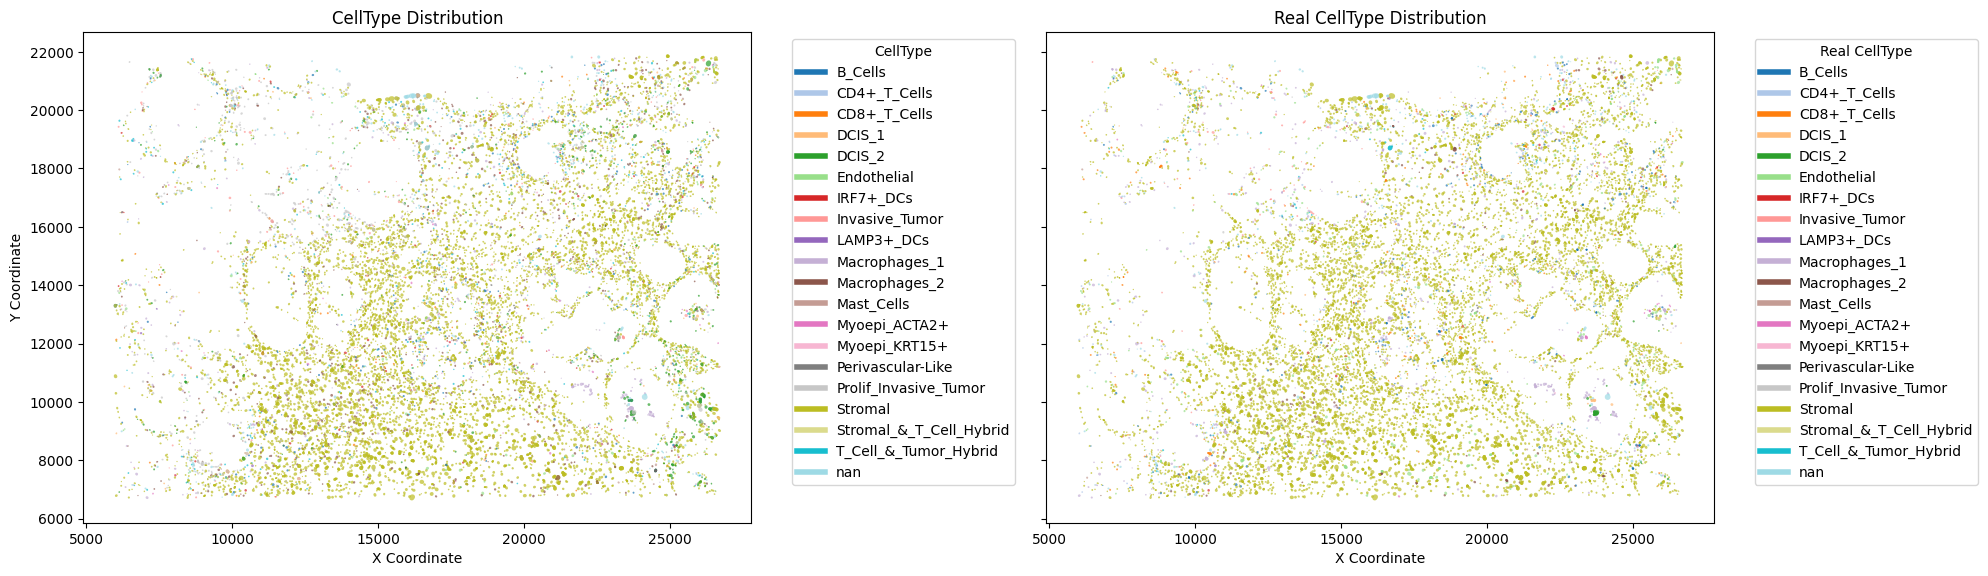

In [57]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Convert CellType and realCellType to string to ensure proper handling
filtered_joined_with_types['CellType'] = filtered_joined_with_types['CellType'].astype(str)
filtered_joined_with_types['realCellType'] = filtered_joined_with_types['realCellType'].astype(str)

# Extract unique categories from both columns
cell_type_categories = filtered_joined_with_types['CellType'].unique()
real_cell_type_categories = filtered_joined_with_types['realCellType'].unique()

# Combine unique categories from both columns
all_categories = sorted(set(cell_type_categories).union(real_cell_type_categories))

# Define a colormap with enough colors for all unique categories
num_categories = len(all_categories)
cmap = plt.get_cmap('tab20', num_categories) 
colors = {category: cmap(i) for i, category in enumerate(all_categories)}

# Define functions to get color based on category
def get_color(category):
    return colors.get(category, 'gray')  # Default to gray for unknown types

# Create legend handles
handles = [Line2D([0], [0], color=colors[cat], lw=4) for cat in all_categories]

# Create a figure with two subplots
fig, axarr = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

# Plot by 'CellType'
filtered_joined_with_types.plot(
    ax=axarr[0],
    color=[get_color(ct) for ct in filtered_joined_with_types['CellType']],
    alpha=0.7
)
axarr[0].set_title('CellType Distribution')
axarr[0].set_xlabel('X Coordinate')
axarr[0].set_ylabel('Y Coordinate')
axarr[0].legend(handles=handles, labels=all_categories, title='CellType', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot by 'realCellType'
filtered_joined_with_types.plot(
    ax=axarr[1],
    color=[get_color(rct) for rct in filtered_joined_with_types['realCellType']],
    alpha=0.7
)
axarr[1].set_title('Real CellType Distribution')
axarr[1].set_xlabel('X Coordinate')
axarr[1].legend(handles=handles, labels=all_categories, title='Real CellType', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [58]:
filtered_gdf = filtered_joined_with_types

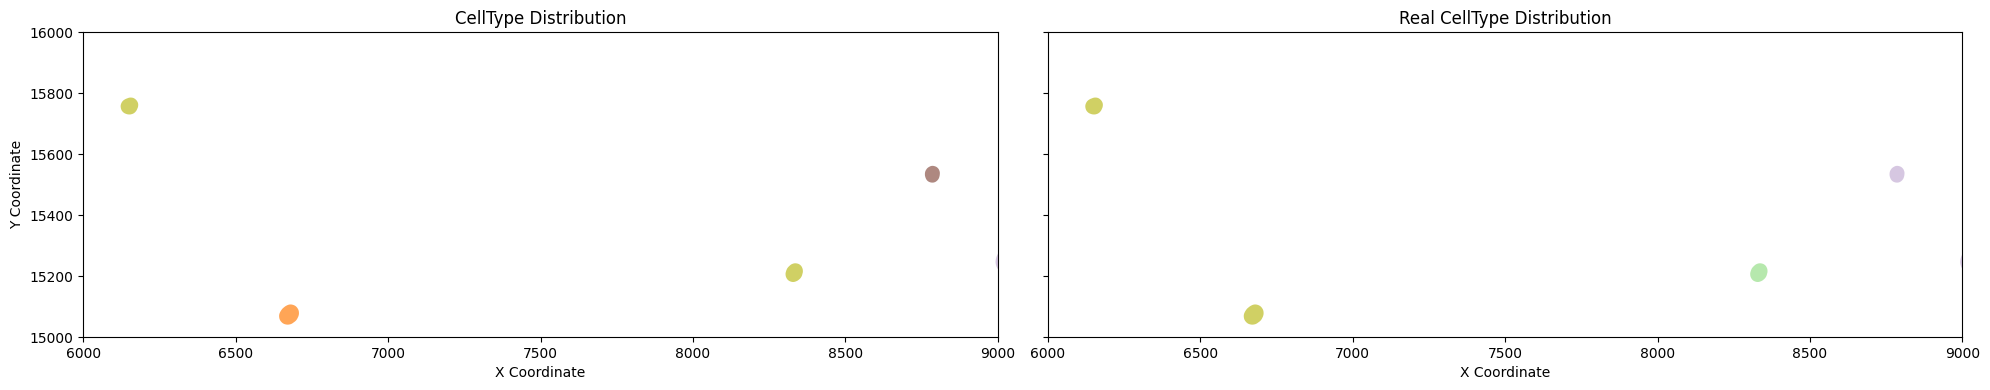

In [59]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Convert CellType and realCellType to string to ensure proper handling
filtered_gdf['CellType'] = filtered_gdf['CellType'].astype(str)
filtered_gdf['realCellType'] = filtered_gdf['realCellType'].astype(str)

# Extract unique categories from both columns
cell_type_categories = filtered_gdf['CellType'].unique()
real_cell_type_categories = filtered_gdf['realCellType'].unique()

# Combine unique categories from both columns
all_categories = sorted(set(cell_type_categories).union(real_cell_type_categories))

# Define a colormap with enough colors for all unique categories
num_categories = len(all_categories)
cmap = plt.get_cmap('tab20', num_categories) 
colors = {category: cmap(i) for i, category in enumerate(all_categories)}

# Define functions to get color based on category
def get_color(category):
    return colors.get(category, 'gray')  # Default to gray for unknown types

# Create legend handles
handles = [Line2D([0], [0], color=colors[cat], lw=4) for cat in all_categories]

# Create a figure with two subplots
fig, axarr = plt.subplots(1, 2, figsize=(20, 20), sharex=True, sharey=True)

# Define your zoom area (bounding box coordinates)
xmin, xmax, ymin, ymax = 6000, 9000, 15000, 16000  # Adjust these values as needed

# Plot by 'CellType'
filtered_gdf.plot(
    ax=axarr[0],
    color=[get_color(ct) for ct in filtered_gdf['CellType']],
    alpha=0.7
)
axarr[0].set_title('CellType Distribution')
axarr[0].set_xlabel('X Coordinate')
axarr[0].set_ylabel('Y Coordinate')
axarr[0].set_xlim(xmin, xmax)  # Set x-axis limits for zoom
axarr[0].set_ylim(ymin, ymax)  # Set y-axis limits for zoom

# Plot by 'realCellType'
filtered_gdf.plot(
    ax=axarr[1],
    color=[get_color(rct) for rct in filtered_gdf['realCellType']],
    alpha=0.7
)
axarr[1].set_title('Real CellType Distribution')
axarr[1].set_xlabel('X Coordinate')
axarr[1].set_xlim(xmin, xmax)  # Set x-axis limits for zoom
axarr[1].set_ylim(ymin, ymax)  # Set y-axis limits for zoom
# Adjust layout and display
plt.tight_layout()
plt.show()


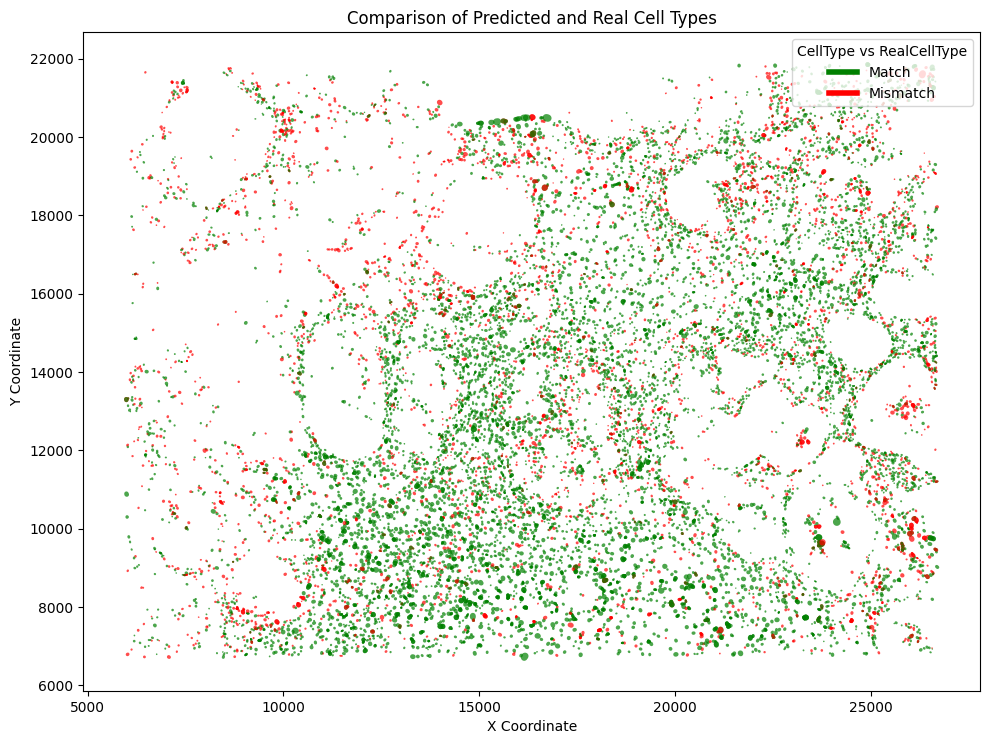

In [60]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Convert CellType and realCellType to string to ensure proper handling
filtered_joined_with_types['CellType'] = filtered_joined_with_types['CellType'].astype(str)
filtered_joined_with_types['realCellType'] = filtered_joined_with_types['realCellType'].astype(str)

# Add a new column to indicate where CellType matches realCellType
filtered_joined_with_types['Match'] = filtered_joined_with_types['CellType'] == filtered_joined_with_types['realCellType']

# Define colors for matching (green) and non-matching (red)
match_colors = {True: 'green', False: 'red'}

# Create a figure
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the polygons with colors based on the Match column
filtered_joined_with_types.plot(
    ax=ax,
    color=[match_colors[match] for match in filtered_joined_with_types['Match']],
    alpha=0.7
)

# Create custom legend
handles = [Line2D([0], [0], color='green', lw=4, label='Match'),
           Line2D([0], [0], color='red', lw=4, label='Mismatch')]

ax.legend(handles=handles, title='CellType vs RealCellType')

# Set title and labels
ax.set_title('Comparison of Predicted and Real Cell Types')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
